In [ ]:
using SpecialFunctions

In [6]:
k1=1
k2=k1+1
c1=-1
c2=1
gammaConst=2/sqrt(pi)

1.1283791670955126

In [ ]:
# Check that SpecialFunctions' erf agrees with our expectations
erf(0) ≈ 0.0
erf(1e4) ≈ 1.0

In [ ]:
function rootEqn(alpha, k1=1, k2=k1+1, c1=-1, c2=-1, gammaConst=2/sqrt(pi))
    sk1 = sqrt(k1)
    sk2 = sqrt(k2)
    A1 = sk1 * c1 * exp(-(alpha*alpha)/(4*k1)) / erf(alpha / (2sk1))
    A2 = sk2 * c2 * exp(-(alpha*alpha)/(4*k2)) / (1-erf(alpha / (2sk2)))
    A3 = (gammaConst*sqrt(pi)/2)*alpha
    A1 + A2 + A3
end

In [ ]:
@code_warntype rootEqn(1.0)

In [ ]:
using PyPlot

In [ ]:
x = linspace(0.2, 1.5, 2e2)
withfig(figure()) do
    plot(x, map(rootEqn, x))
end

In [ ]:
x = linspace(0.5, 2, 2e2)
k1range = 1:4
withfig(figure()) do
    for k1 in k1range
        plot(x, map(t->rootEqn(t, k1, k1 + 1, -1, 1, 2/sqrt(pi)), x))
    end
    legend(["rootEqn(x, k1=$(k1), k2=$(k1 + 1), c1=-1, c2=1, gammaConst=2/√π)" for k1 in k1range], loc=8, fontsize="x-small")
end

In [ ]:
x = linspace(0.2, 1.4, 2e2)
k2DiffRange = 1:4
k1=1
withfig(figure()) do
    for k2Diff in k2DiffRange
        plot(x, map(t->rootEqn(t, k1, k1 + k2Diff, -1, 1, 2/sqrt(pi)), x))
    end
    legend(["rootEqn(x, k1=$(k1), k2=$(k1 + k2Diff), c1=-1, c2=1, gammaConst=2/√π)" for k2Diff in k2DiffRange], loc=8, fontsize="x-small")
end

In [ ]:
x = linspace(0.5, 2, 2e2)
c1range = -4:-1
k1=1
k2Diff=1
withfig(figure()) do
    for c1 in c1range
        plot(x, map(t->rootEqn(t, k1, k1 + k2Diff, c1, 1, 2/sqrt(pi)), x))
    end
    legend(["rootEqn(x, k1=$(k1), k2=$(k1 + k2Diff), c1=$(c1), c2=1, gammaConst=2/√π)" for c1 in c1range], loc=8, fontsize="x-small")
end

In [ ]:
x = linspace(0.2, 2, 2e2)
c2range = 1:4
k1=1
k2Diff=1
c1=-1
withfig(figure()) do
    for c2 in c2range
        plot(x, map(t->rootEqn(t, k1, k1 + k2Diff, c1, c2, 2/sqrt(pi)), x))
    end
    legend(["rootEqn(x, k1=$(k1), k2=$(k1 + k2Diff), c1=$(c1), c2=$(c2), gammaConst=2/√π)" for c2 in c2range], loc=8, fontsize="x-small")
end

In [ ]:
x = linspace(0.2, 2, 2e2)
gammaConstRange = 1:4
k1=1
k2Diff=1
c1=-1
c2=1
withfig(figure()) do
    for gammaMod in gammaConstRange
        plot(x, map(t->rootEqn(t, k1, k1 + k2Diff, c1, c2, gammaMod*2/sqrt(pi)), x))
    end
    legend(["rootEqn(x, k1=$(k1), k2=$(k1 + k2Diff), c1=$(c1), c2=$(c2), gammaConst=$(gammaMod*2)/√π)" for gammaMod in gammaConstRange], loc=8, fontsize="x-small")
end

In [2]:
# Note: This path only works locally; you may need to adjust this
# if MISPTools is installed somewhere else on your machine.
TSE = include(joinpath(dirname(dirname(pwd())), "MISPCode", "MISPTools", "example", "TikhonovSamarskii.jl"))

TikhonovSamarskiiExample

In [7]:
paramsWithoutAlpha = TSE.SimplifiedProblem(c1, k1, k2, gammaConst)
params = TSE.withAlpha(paramsWithoutAlpha, 1e-2, 4)

TikhonovSamarskiiExample.ProblemData{Float64}(-1.0, 0.0, 1.0, 2.0, 1.1283791670955126, 1.1819035533703448)

In [9]:
finalMoment = 1.0
xi(t) = TSE.xi(t, params)
xiT = xi(finalMoment)
u(x,t) = TSE.u(x, t, params)
g(t) = TSE.g(t, params)
p(t) = TSE.p(t, params)
nu(t) = TSE.nu(t, params)

nu (generic function with 1 method)

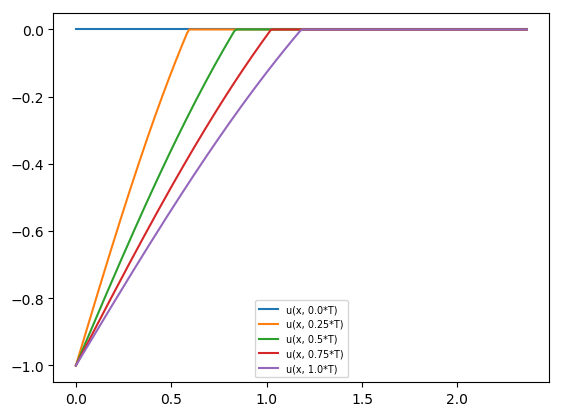

In [10]:
x = linspace(0, 2*xiT, 2e2)
tQuantiles = [0.0, 0.25, 0.5, 0.75, 1.0]
withfig(figure()) do
    for tQuantile in tQuantiles
        plot(x, map(x->u(x, tQuantile*finalMoment), x))
    end
    legend(["u(x, $(tQuantile)*T)" for tQuantile in tQuantiles], loc=8, fontsize="x-small")
end

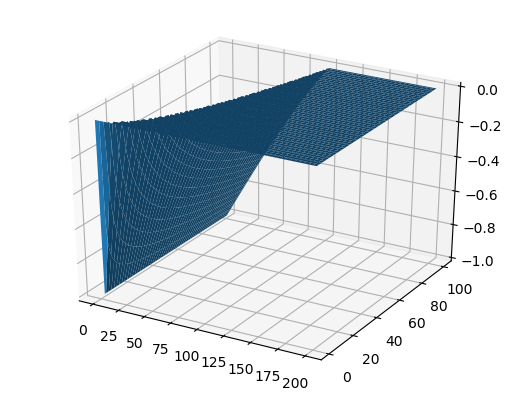

In [20]:
x = linspace(0, 2*xiT, 2e2)
t = linspace(0, finalMoment, 100)
UMat = [u(xi,tk) for xi in x, tk in t]
withfig(figure()) do
    surf(UMat)
end

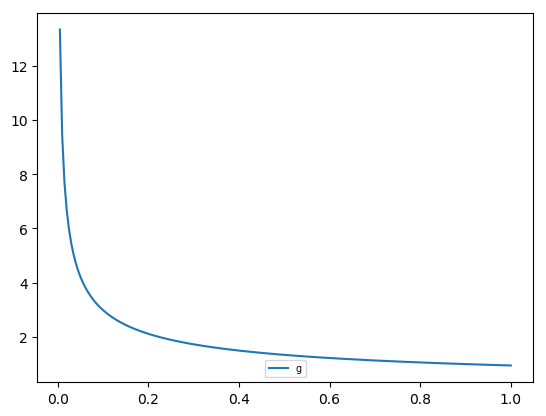

In [16]:
TV = linspace(0, finalMoment, 2e2)
withfig(figure()) do
    plot(TV, map(g, TV))
    legend("g(t) = k_1 u_x(0, t)", loc=8, fontsize="x-small")
end

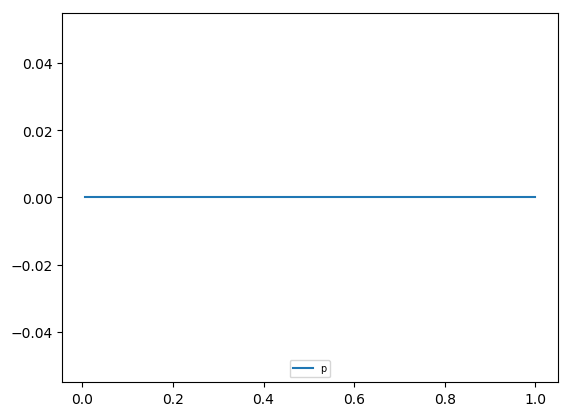

In [17]:
TV = linspace(0, finalMoment, 2e2)
withfig(figure()) do
    plot(TV, map(p, TV))
    legend("p(t) = k_2 u_x(2*xi(t), t)", loc=8, fontsize="x-small")
end

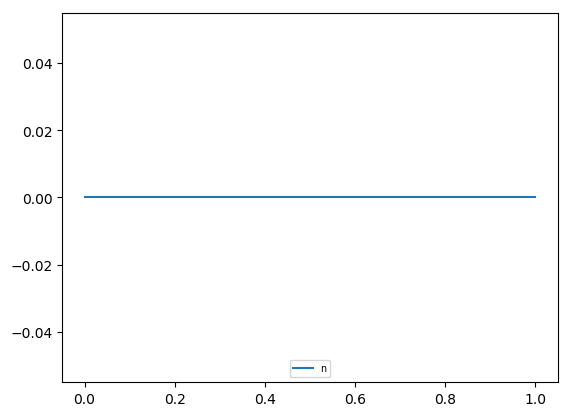

In [18]:
TV = linspace(0, finalMoment, 2e2)
withfig(figure()) do
    plot(TV, map(nu, TV))
    legend("nu(t) = u(2*xi(t), t)", loc=8, fontsize="x-small")
end